In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [418]:
df=pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [421]:
df.shape

(145460, 23)

In [422]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
numeric_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

## Dealing with Null Values

In [423]:
null_values = df[numeric_columns].isnull().sum()

print("Null Values in Numeric Columns:")
print(null_values)


Null Values in Numeric Columns:
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64


In [424]:
# Remove columns with more than a certain percentage of missing data (e.g., 50%)
threshold = 0.5
cols_to_remove = null_values[null_values > threshold * len(df)].index
df = df.drop(cols_to_remove, axis=1)


In [425]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
numeric_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [426]:
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())


In [427]:
df[numeric_columns].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [429]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()

for col in object_columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

print(df[object_columns].isnull().sum())


Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64


## Drop Duplicates

In [467]:
df = df.drop_duplicates()

## Detecting Outliers

In [430]:
len(numeric_columns)

16

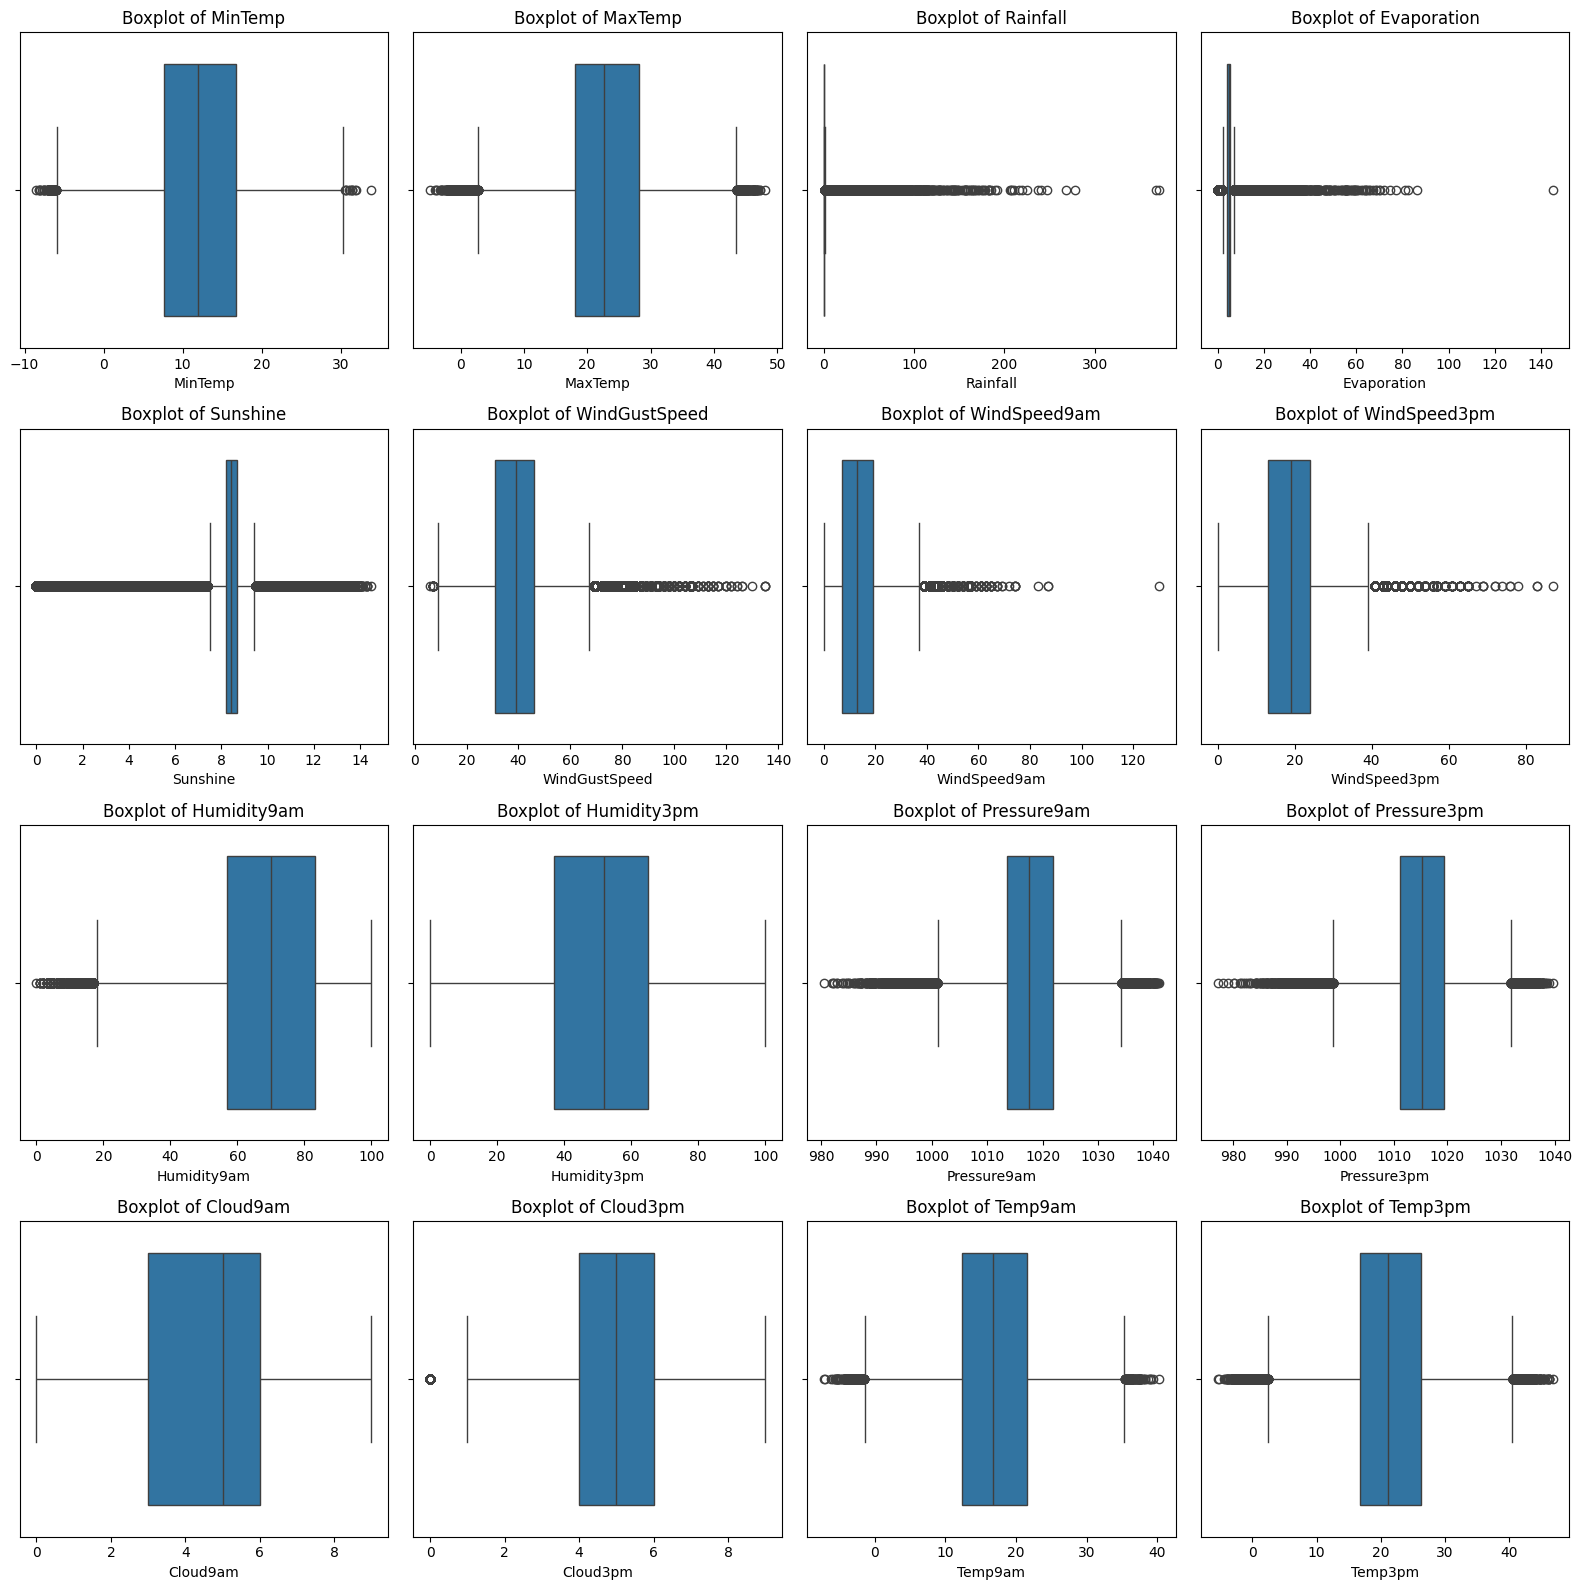

In [431]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    
plt.tight_layout()


In [432]:
def replace_outliers_with_bounds(df):
    numeric_columns = df.select_dtypes(include=np.number).columns
    
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

In [433]:
df = replace_outliers_with_bounds(df)

df.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.00000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.192336,23.219758,0.381674,4.750932,8.422820,39.64328,13.939757,18.583126,68.953025,51.553396,1017.671706,1015.268537,4.659755,4.744108,16.988207,21.671194
std,6.364499,7.067804,0.608638,1.454089,0.676532,12.17591,8.555976,8.442404,18.704151,20.471345,6.568469,6.528909,2.281490,2.037004,6.440883,6.813343
min,-5.950000,2.700000,0.000000,2.200000,7.450000,8.50000,0.000000,0.000000,18.000000,0.000000,1001.050000,998.650000,0.000000,1.000000,-1.500000,2.450000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.00000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.00000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.00000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,30.450000,43.500000,1.500000,7.000000,9.450000,68.50000,37.000000,40.500000,100.000000,100.000000,1034.250000,1031.850000,9.000000,9.000000,35.300000,40.450000


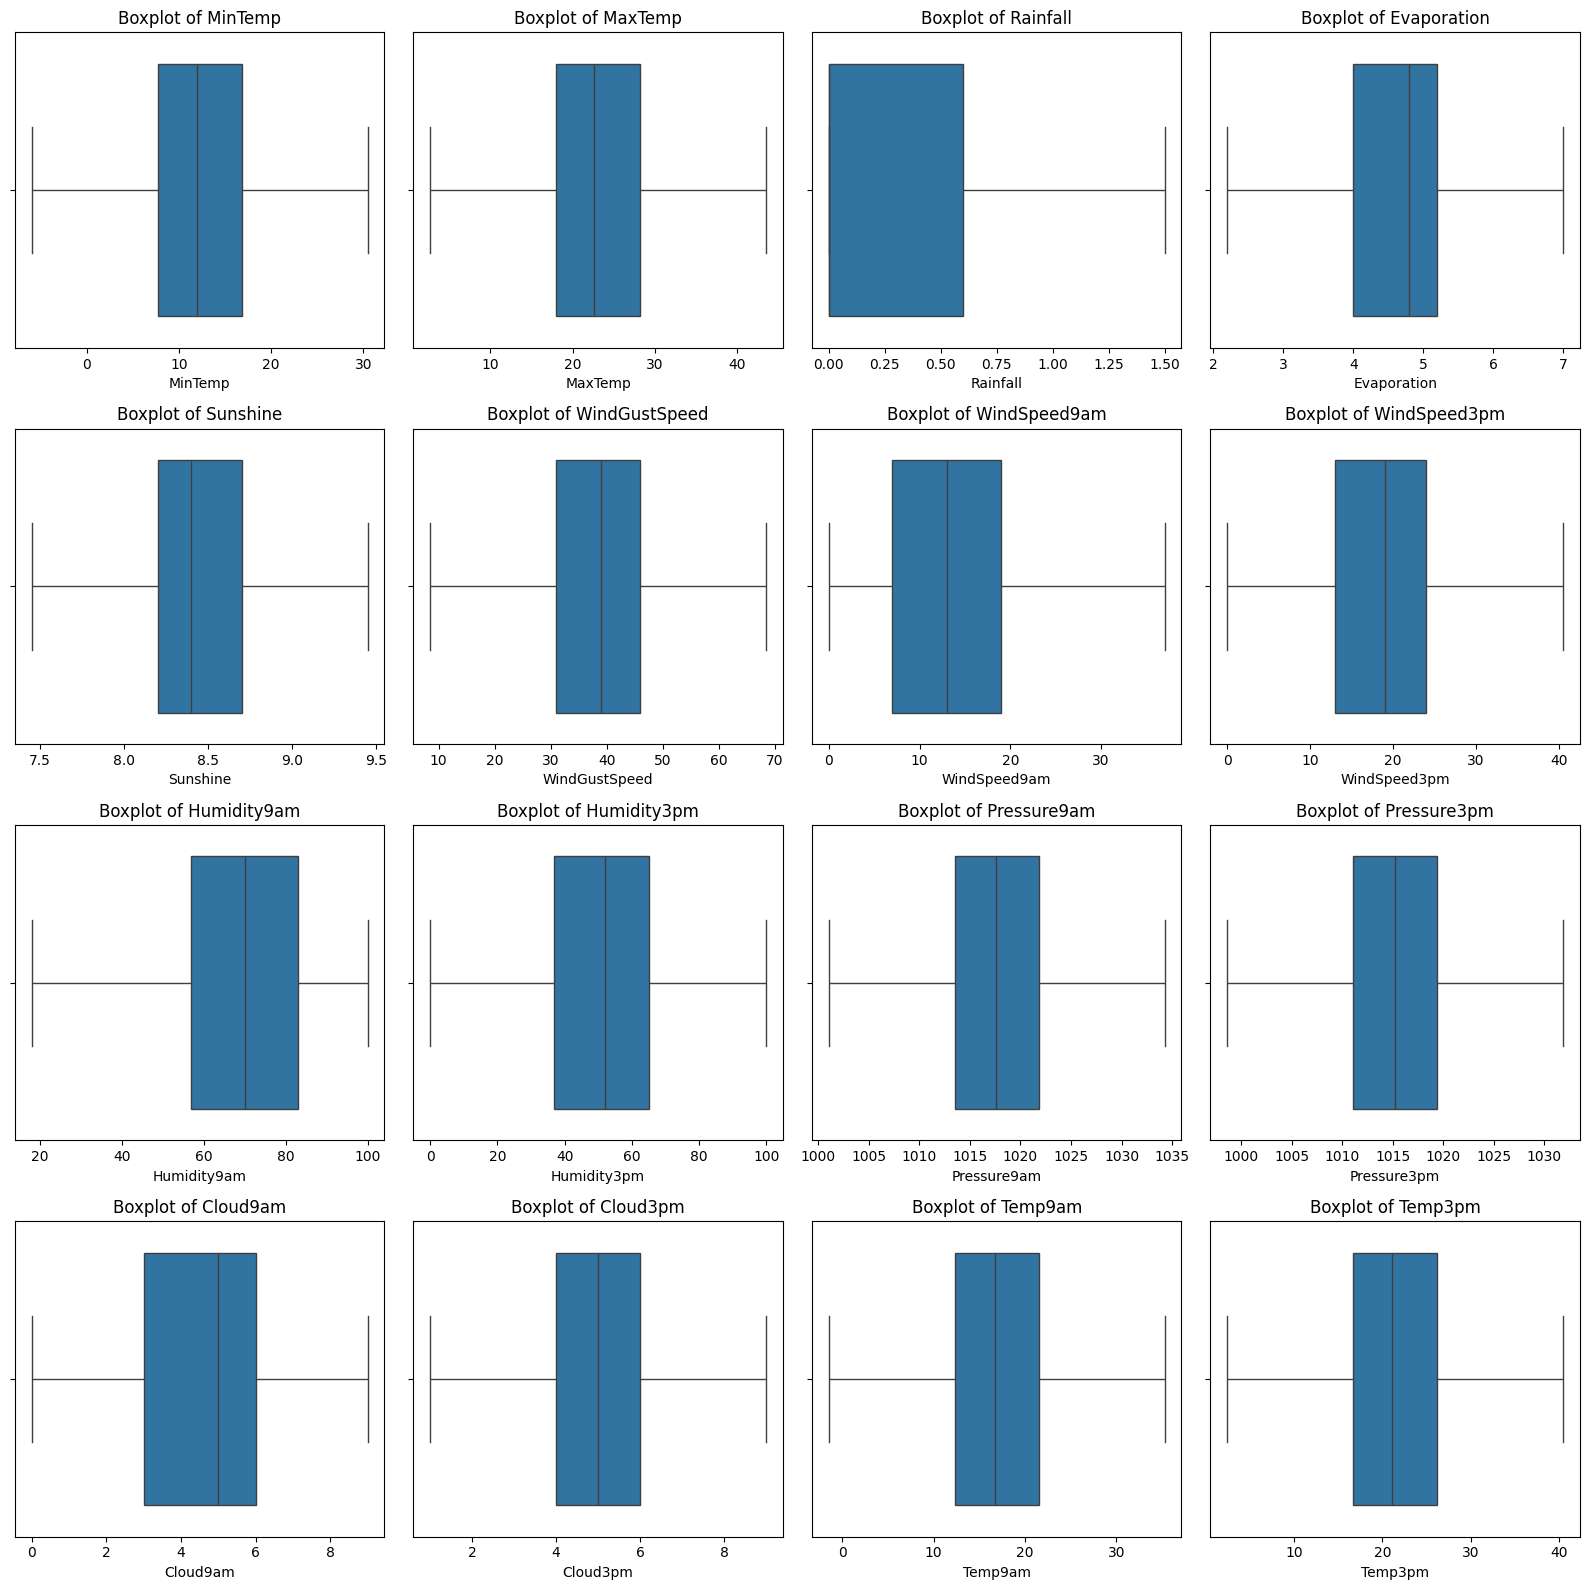

In [434]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    
plt.tight_layout()

## feature engineering

In [435]:
df['Date'] = pd.to_datetime(df['Date'])


In [436]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday


In [437]:
df['Duration'] = (df['Date'] - df['Date'].min()).dt.days

In [438]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Weekday,Duration
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,5.0,16.9,21.8,No,No,2008,12,1,0,396
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,5.0,17.2,24.3,No,No,2008,12,2,1,397
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,2.0,21.0,23.2,No,No,2008,12,3,2,398
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,5.0,18.1,26.5,No,No,2008,12,4,3,399
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,8.0,17.8,29.7,No,No,2008,12,5,4,400


In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [440]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [441]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [442]:
direction_mapping = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90, 
    'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 'S': 180, 
    'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270, 
    'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

def encode_wind_direction(df, column):
    df[f'{column}_sin'] = df[column].map(direction_mapping).apply(lambda x: np.sin(np.radians(x)))
    df[f'{column}_cos'] = df[column].map(direction_mapping).apply(lambda x: np.cos(np.radians(x)))
    df.drop(column, axis=1, inplace=True)
    return df

for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    your_dataframe = encode_wind_direction(df, col)



In [443]:
print(df.shape)


(145460, 31)


In [444]:
print(df['RainToday'].unique())
print(df['RainTomorrow'].unique())

['No' 'Yes']
['No' 'Yes']


In [445]:
df = df.drop(columns=['Location'])

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             145460 non-null  datetime64[ns]
 1   MinTemp          145460 non-null  float64       
 2   MaxTemp          145460 non-null  float64       
 3   Rainfall         145460 non-null  float64       
 4   Evaporation      145460 non-null  float64       
 5   Sunshine         145460 non-null  float64       
 6   WindGustSpeed    145460 non-null  float64       
 7   WindSpeed9am     145460 non-null  float64       
 8   WindSpeed3pm     145460 non-null  float64       
 9   Humidity9am      145460 non-null  float64       
 10  Humidity3pm      145460 non-null  float64       
 11  Pressure9am      145460 non-null  float64       
 12  Pressure3pm      145460 non-null  float64       
 13  Cloud9am         145460 non-null  float64       
 14  Cloud3pm         145

In [447]:
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})


In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             145460 non-null  datetime64[ns]
 1   MinTemp          145460 non-null  float64       
 2   MaxTemp          145460 non-null  float64       
 3   Rainfall         145460 non-null  float64       
 4   Evaporation      145460 non-null  float64       
 5   Sunshine         145460 non-null  float64       
 6   WindGustSpeed    145460 non-null  float64       
 7   WindSpeed9am     145460 non-null  float64       
 8   WindSpeed3pm     145460 non-null  float64       
 9   Humidity9am      145460 non-null  float64       
 10  Humidity3pm      145460 non-null  float64       
 11  Pressure9am      145460 non-null  float64       
 12  Pressure3pm      145460 non-null  float64       
 13  Cloud9am         145460 non-null  float64       
 14  Cloud3pm         145

In [449]:
sample_df = df.sample(n=5000, random_state=42)


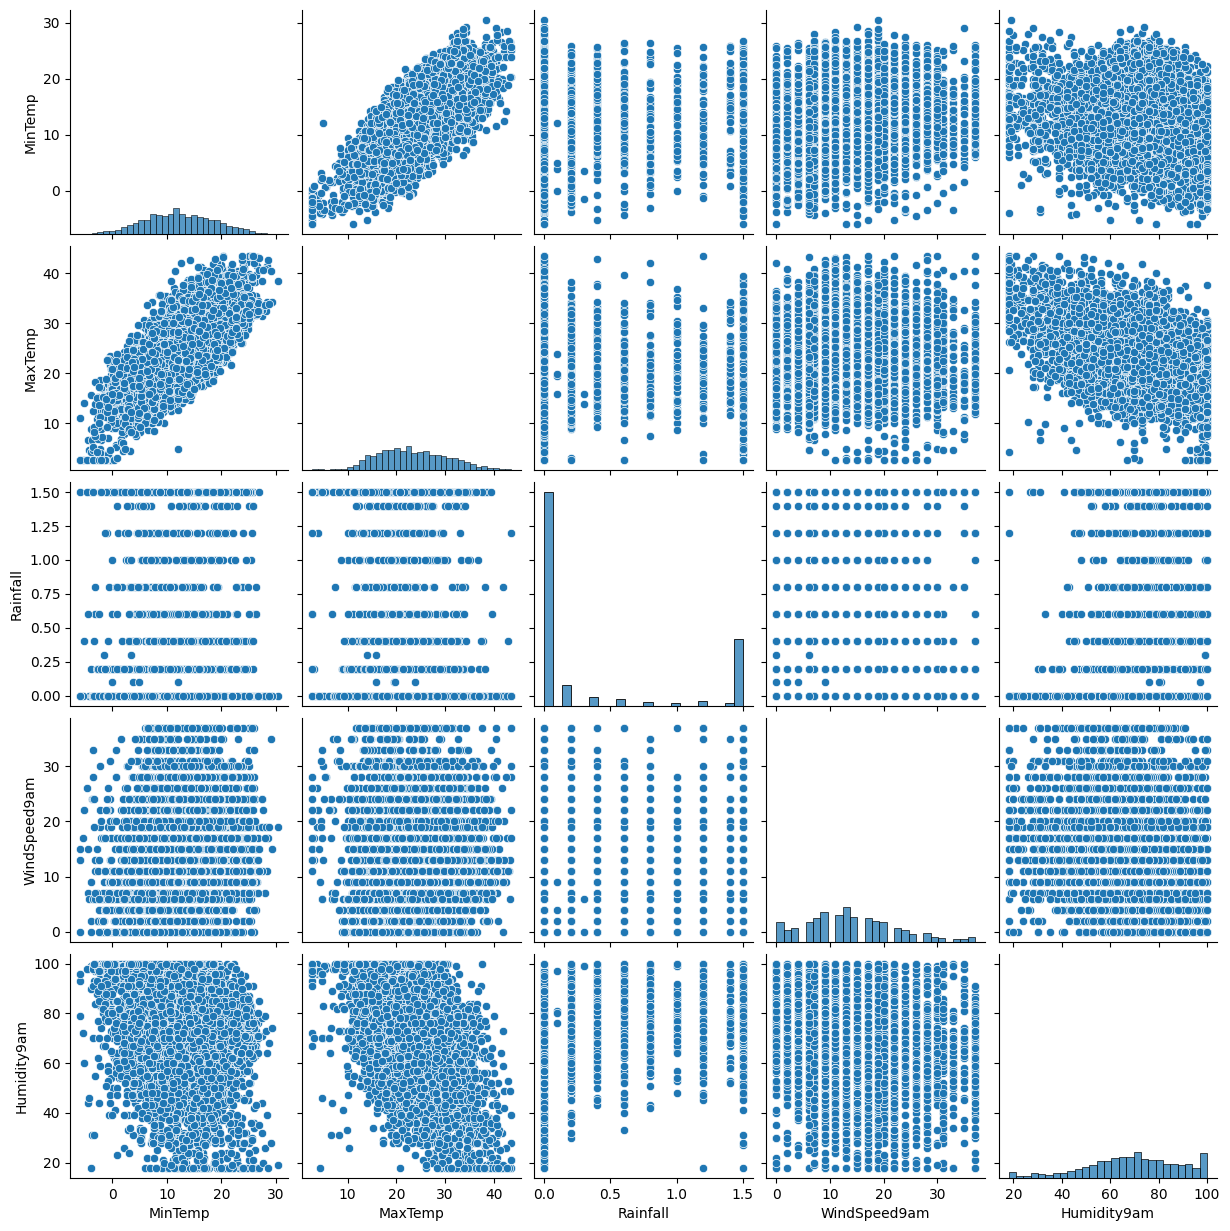

In [450]:
sns.pairplot(sample_df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'Humidity9am']])
plt.show()



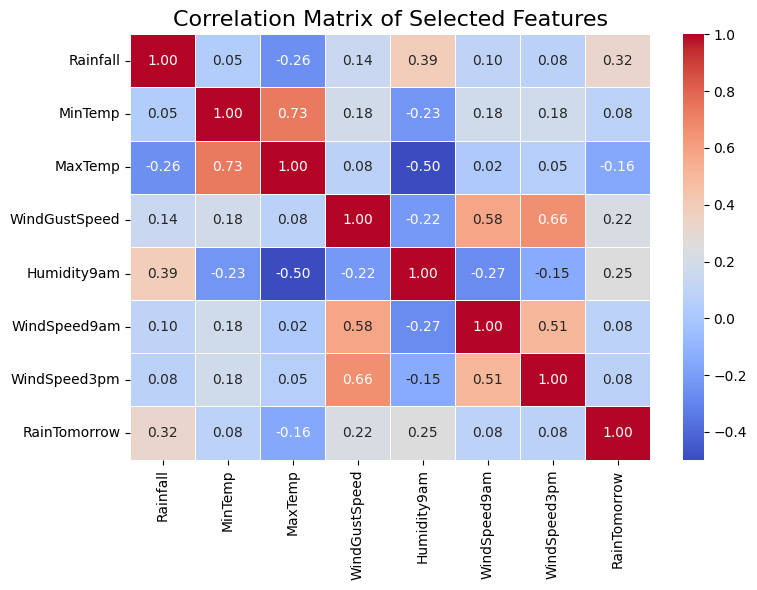

In [451]:
selected_columns = ['Rainfall', 'MinTemp', 'MaxTemp', 'WindGustSpeed', 'Humidity9am', 'WindSpeed9am', 'WindSpeed3pm', 'RainTomorrow']

correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix of Selected Features', fontsize=16)
plt.tight_layout()
plt.show()

In [452]:
import plotly.express as px
px.histogram(sample_df, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')

In [453]:
px.histogram(sample_df, 
             x='RainTomorrow', 
             color='RainToday', 
             title='Rain Tomorrow vs. Rain Today')

In [454]:
px.scatter(sample_df.sample(2000), 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

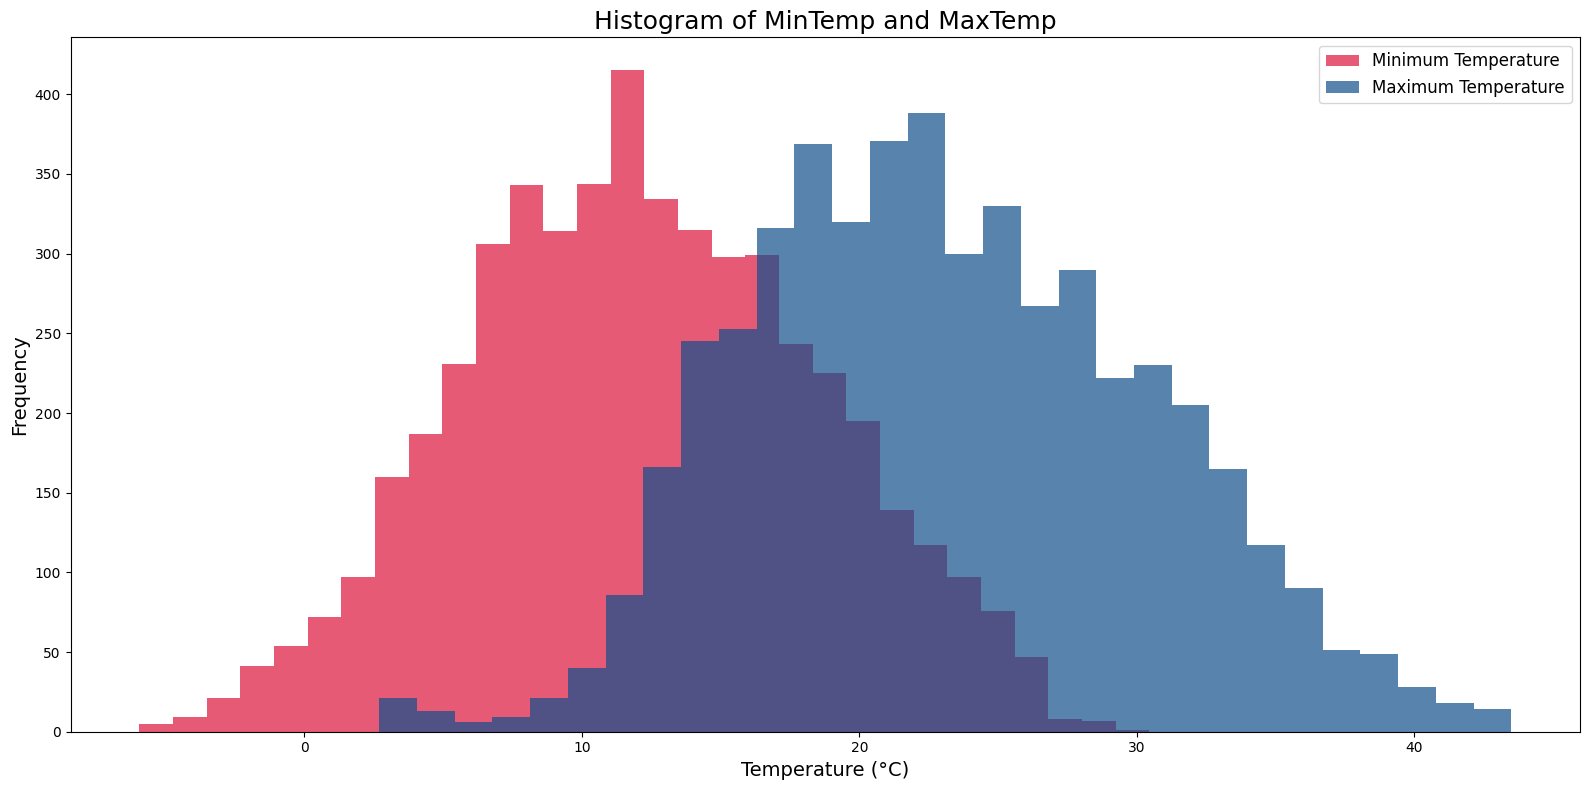

In [455]:
plt.figure(figsize=(16, 8))

# Plot histogram for Minimum Temperature
plt.hist(sample_df['MinTemp'], bins=30, alpha=0.7, color='#DC143C', label='Minimum Temperature')

# Plot histogram for Maximum Temperature
plt.hist(sample_df['MaxTemp'], bins=30, alpha=0.7, color='#104E8B', label='Maximum Temperature')

# Add title and labels
plt.title('Histogram of MinTemp and MaxTemp', fontsize=18)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [456]:
minimum_temperature = sample_df['MinTemp'].min()
print("Minimum Temperature:",minimum_temperature,"Degrees Celsius")
maximum_temperature = sample_df['MaxTemp'].max()
print("Maximum Temperature:",maximum_temperature,"Degrees Celsius")

Minimum Temperature: -5.950000000000002 Degrees Celsius
Maximum Temperature: 43.5 Degrees Celsius


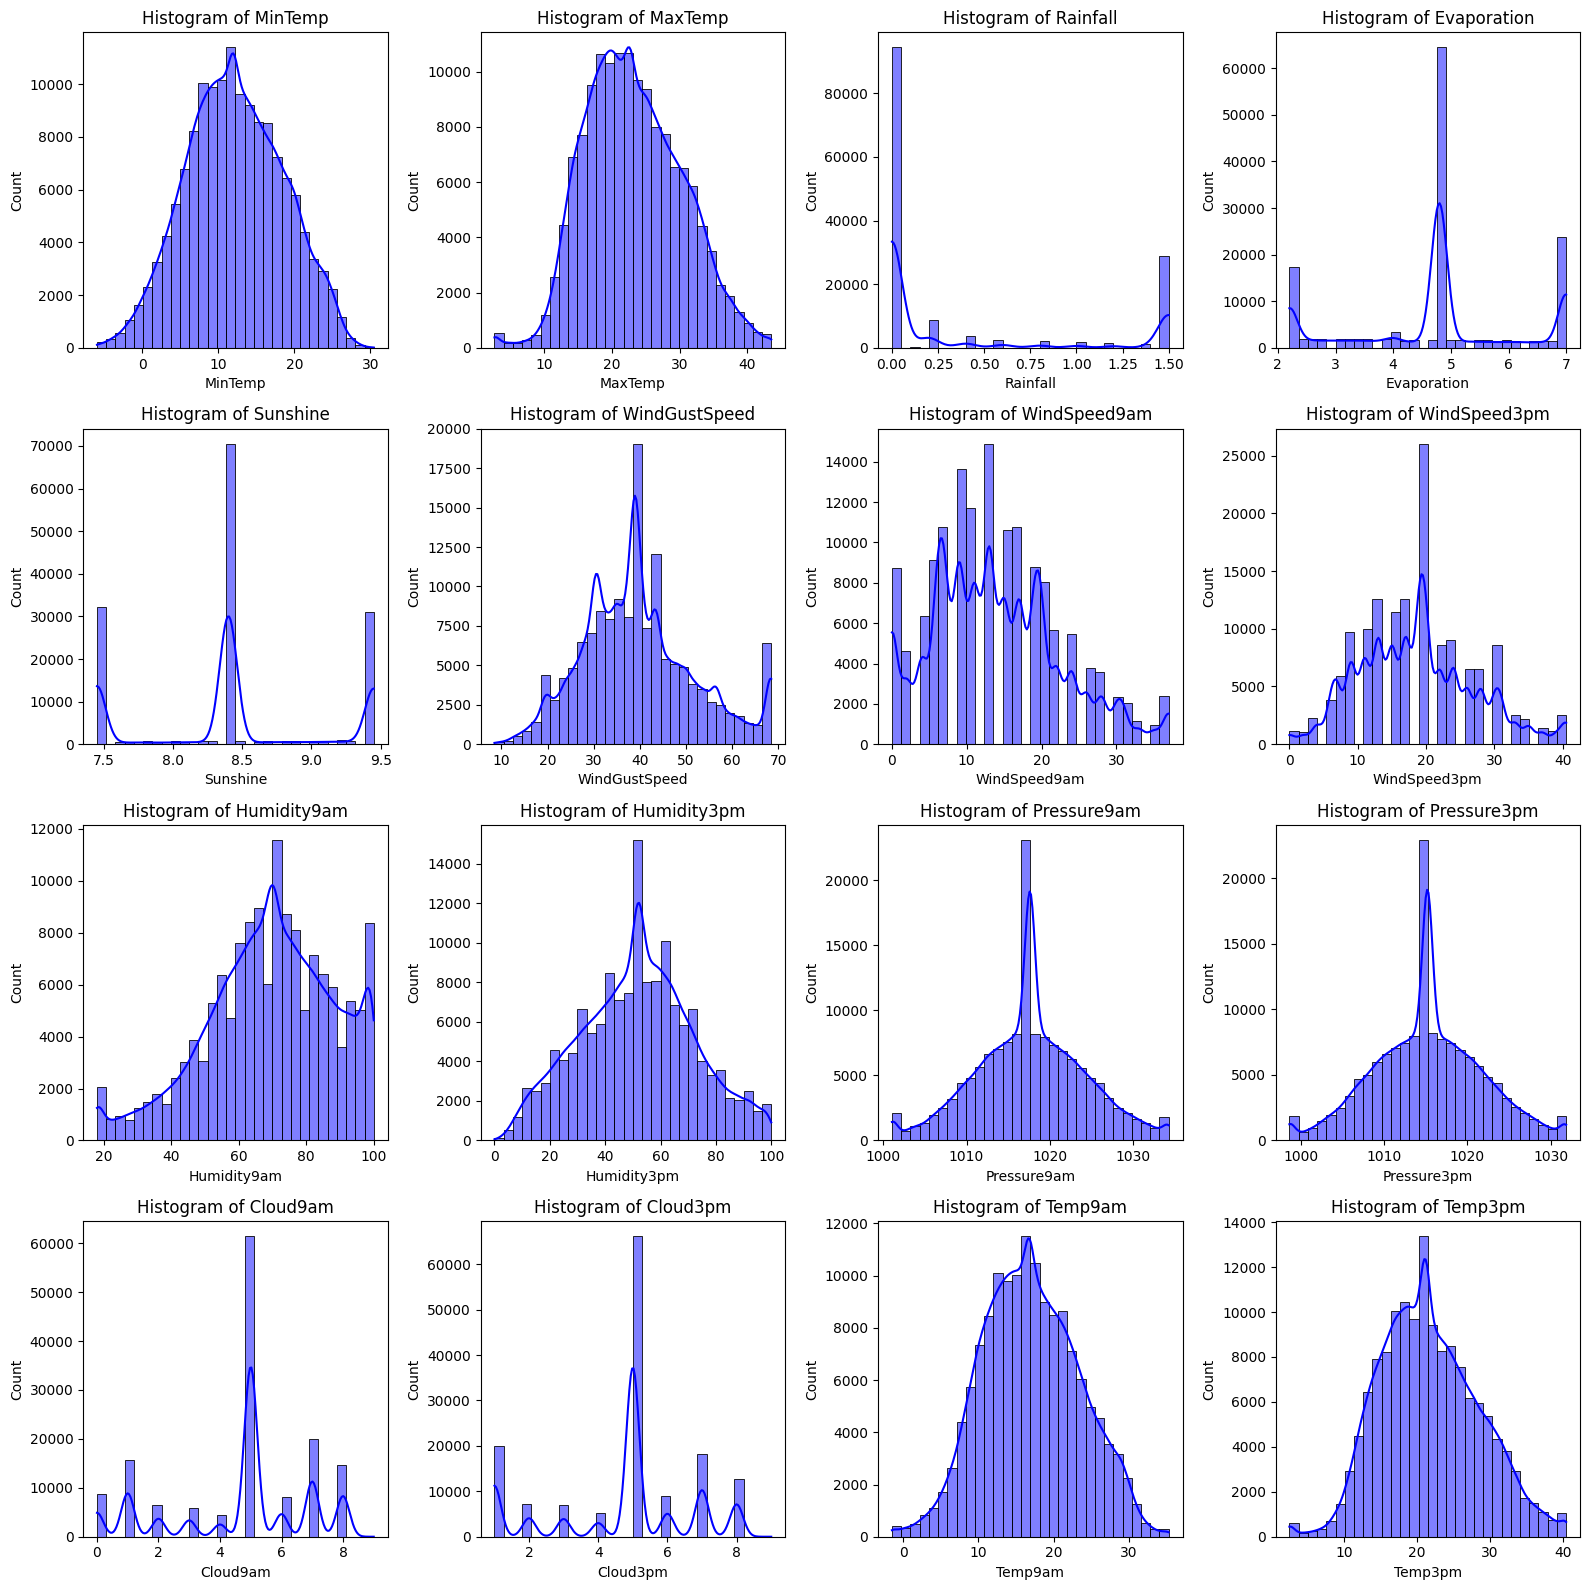

In [457]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], ax=axes[i], kde=True, color='blue', bins=30)  
    axes[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

In [458]:
numeric_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [459]:
df.shape

(145460, 30)

In [460]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

scaled_values = scaler.fit_transform(df[numeric_columns])

scaled_df = pd.DataFrame(scaled_values, columns=numeric_columns)

df_scaled = df.drop(columns=numeric_columns).join(scaled_df)

df_scaled.head()

,Date,RainToday,RainTomorrow,Year,Month,Day,Weekday,Duration,WindGustDir_sin,WindGustDir_cos,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2008-12-01,0,0,2008,12,1,0,396,-1.000000,-1.836970e-16,...,0.540541,0.592593,0.646341,0.22,0.200301,0.254518,0.888889,0.500,0.500000,0.509211
1,2008-12-02,0,0,2008,12,2,1,397,-0.923880,3.826834e-01,...,0.108108,0.543210,0.317073,0.25,0.287651,0.275602,0.555556,0.500,0.508152,0.575000
2,2008-12-03,0,0,2008,12,3,2,398,-0.923880,-3.826834e-01,...,0.513514,0.641975,0.243902,0.30,0.197289,0.302711,0.555556,0.125,0.611413,0.546053
3,2008-12-04,0,0,2008,12,4,3,399,0.707107,7.071068e-01,...,0.297297,0.222222,0.329268,0.16,0.498494,0.426205,0.555556,0.500,0.532609,0.632895
4,2008-12-05,0,0,2008,12,5,4,400,-1.000000,-1.836970e-16,...,0.189189,0.493827,0.780488,0.33,0.293675,0.221386,0.777778,0.875,0.524457,0.717105


In [461]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             145460 non-null  datetime64[ns]
 1   RainToday        145460 non-null  int64         
 2   RainTomorrow     145460 non-null  int64         
 3   Year             145460 non-null  int32         
 4   Month            145460 non-null  int32         
 5   Day              145460 non-null  int32         
 6   Weekday          145460 non-null  int32         
 7   Duration         145460 non-null  int64         
 8   WindGustDir_sin  145460 non-null  float64       
 9   WindGustDir_cos  145460 non-null  float64       
 10  WindDir9am_sin   145460 non-null  float64       
 11  WindDir9am_cos   145460 non-null  float64       
 12  WindDir3pm_sin   145460 non-null  float64       
 13  WindDir3pm_cos   145460 non-null  float64       
 14  MinTemp          145

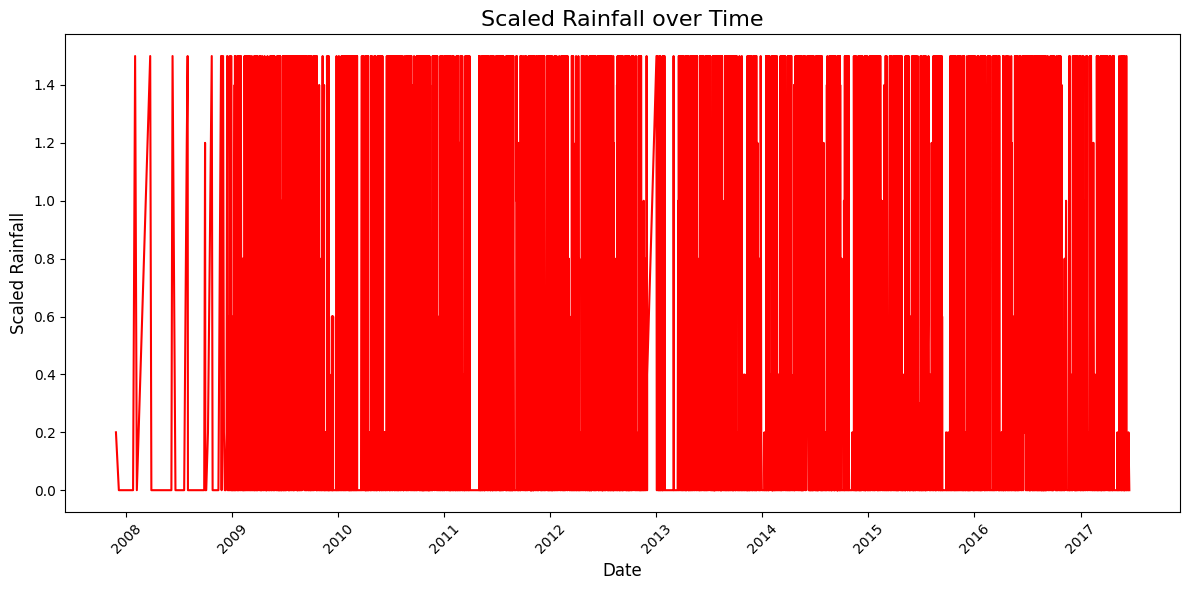

In [462]:
sample_df = sample_df.sort_values(by='Date')

plt.figure(figsize=(12, 6))
plt.plot(sample_df['Date'], sample_df['Rainfall'], color='r', linewidth=1.5)

plt.title('Scaled Rainfall over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Scaled Rainfall', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [466]:
df_scaled.shape

(145456, 30)

In [468]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145456 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             145456 non-null  datetime64[ns]
 1   RainToday        145456 non-null  int64         
 2   RainTomorrow     145456 non-null  int64         
 3   Year             145456 non-null  int32         
 4   Month            145456 non-null  int32         
 5   Day              145456 non-null  int32         
 6   Weekday          145456 non-null  int32         
 7   Duration         145456 non-null  int64         
 8   WindGustDir_sin  145456 non-null  float64       
 9   WindGustDir_cos  145456 non-null  float64       
 10  WindDir9am_sin   145456 non-null  float64       
 11  WindDir9am_cos   145456 non-null  float64       
 12  WindDir3pm_sin   145456 non-null  float64       
 13  WindDir3pm_cos   145456 non-null  float64       
 14  MinTemp          145456 n

In [474]:
train_df = df_scaled[df_scaled['Year'] < 2015]
val_df = df_scaled[df_scaled['Year'] == 2015]
test_df = df_scaled[df_scaled['Year'] > 2015]

print(f"Training data: {train_df.shape}")
print(f"Validation data: {val_df.shape}")
print(f"Testing data: {test_df.shape}")


Training data: (101014, 30)
Validation data: (17885, 30)
Testing data: (26557, 30)


In [478]:
X = df_scaled.drop(['RainTomorrow', 'Date'], axis=1)  
y = df_scaled['RainTomorrow']  


In [479]:
X_train = train_df.drop(['RainTomorrow', 'Date'], axis=1)
y_train = train_df['RainTomorrow']

X_val = val_df.drop(['RainTomorrow', 'Date'], axis=1)
y_val = val_df['RainTomorrow']

X_test = test_df.drop(['RainTomorrow', 'Date'], axis=1)
y_test = test_df['RainTomorrow']


# KNN

In [480]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)  


knn.fit(X_train, y_train)

y_val_pred = knn.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Validation Accuracy: 0.7951355884819681

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89     14237
           1       0.45      0.02      0.04      3648

    accuracy                           0.80     17885
   macro avg       0.62      0.51      0.46     17885
weighted avg       0.73      0.80      0.71     17885



Test Accuracy: 0.7761042286402832

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.87     20611
           1       0.00      0.00      0.00      5946

    accuracy                           0.78     26557
   macro avg       0.39      0.50      0.44     26557
weighted avg       0.60      0.78      0.68     26557



C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



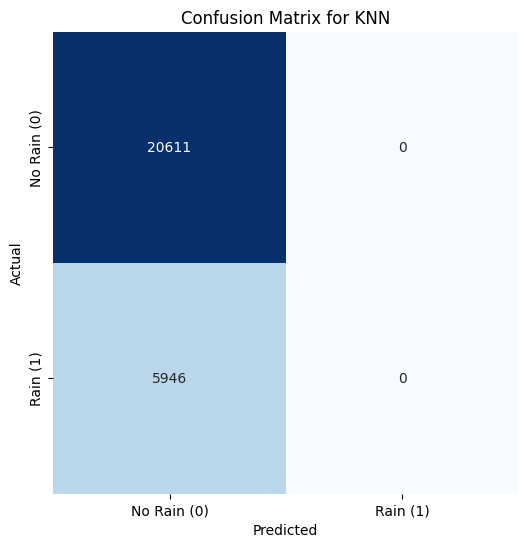

In [495]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


y_test_pred = knn.predict(X_test)

# Print accuracy score
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Rain (0)', 'Rain (1)'], yticklabels=['No Rain (0)', 'Rain (1)'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')

# Display the plot
plt.show()

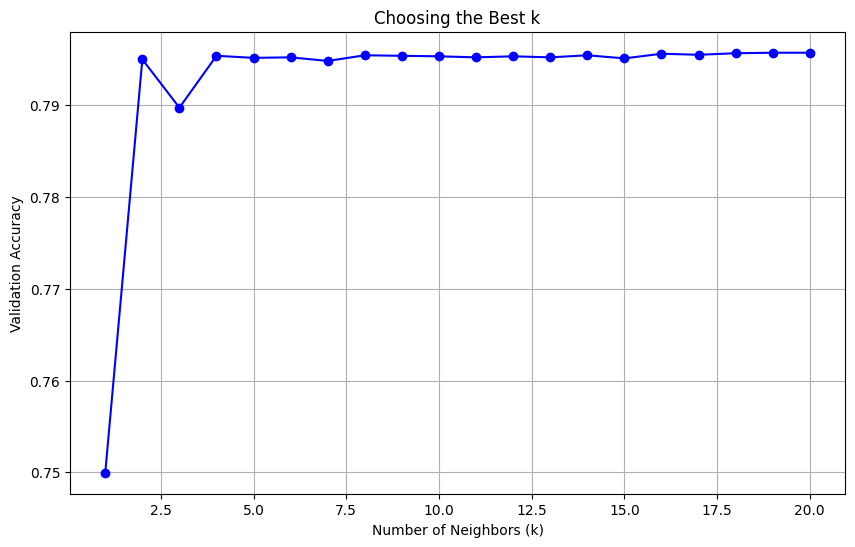

In [482]:
import matplotlib.pyplot as plt

accuracy = []
for k in range(1, 21):  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_val, knn.predict(X_val)))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracy, marker='o', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.title('Choosing the Best k')
plt.grid()
plt.show()


# Decision tree using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],       # Fewer options for the number of trees
    'max_depth': [10, 20, None],    # Key depths to evaluate
    'min_samples_split': [2, 5],    # Reduced split options
    'min_samples_leaf': [1, 2],     # Fewer leaf options
    'max_features': ['sqrt']        # Use only one reliable option
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_val_pred = best_rf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Validation Accuracy: 0.8562482527257478

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.91     14237
           1       0.77      0.42      0.54      3648

    accuracy                           0.86     17885
   macro avg       0.82      0.69      0.73     17885
weighted avg       0.85      0.86      0.84     17885



Test Accuracy: 0.8412847836728546

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.90     20611
           1       0.74      0.45      0.56      5946

    accuracy                           0.84     26557
   macro avg       0.80      0.70      0.73     26557
weighted avg       0.83      0.84      0.83     26557



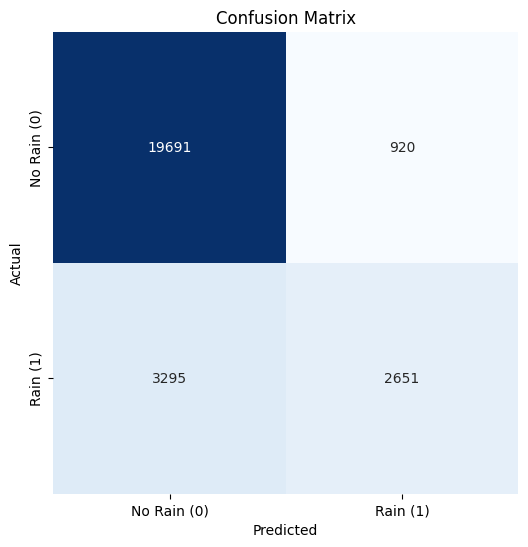

In [494]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_test_pred = best_rf.predict(X_test)

# Print accuracy score
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Rain (0)', 'Rain (1)'], yticklabels=['No Rain (0)', 'Rain (1)'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


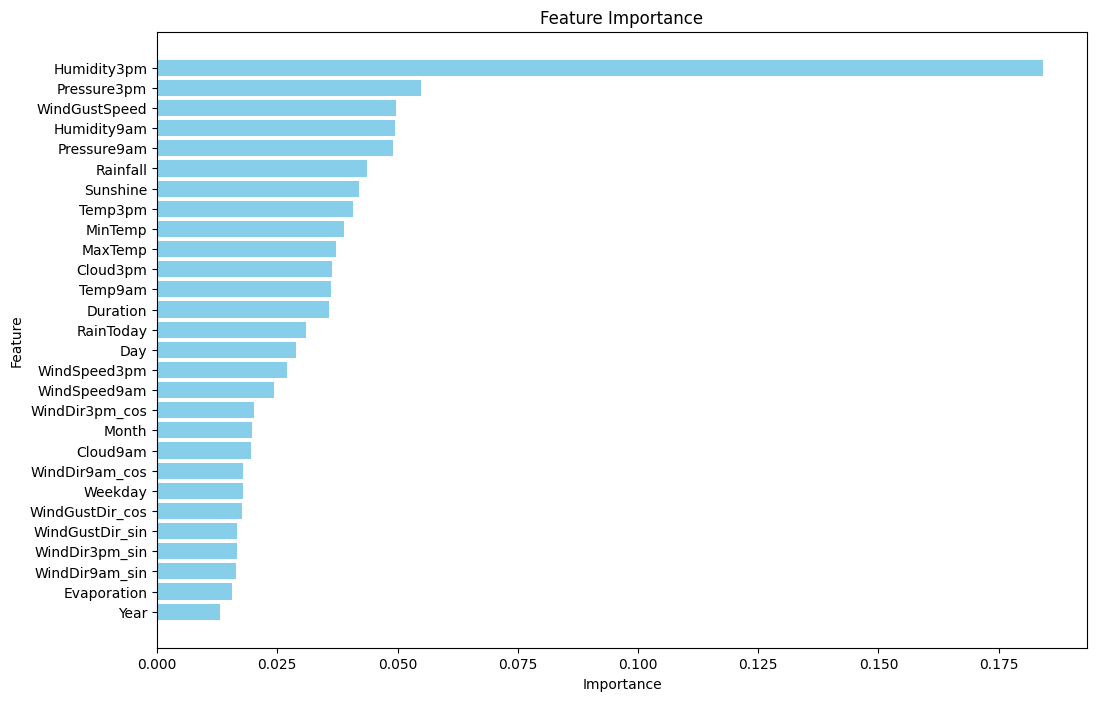

In [488]:
# Get feature importance
feature_importance = best_rf.feature_importances_
feature_names = X_train.columns

# Plot feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()
